# ACADGILD ASSIGNMNET FOR KNN ALGORITHM

In [83]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Read the nba data
df = pd.read_csv('nba_2013.csv')
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [16]:
df.shape

(481, 31)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [18]:
# Count number of NAN
df.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [20]:
df.columns # Remove player, id, season and season_end

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [21]:
df.drop('player',axis=1,inplace=True)

In [22]:
df.drop('bref_team_id',axis=1,inplace=True)

In [23]:
df.drop('season',axis=1,inplace=True)

In [24]:
df.drop('season_end',axis=1,inplace=True)

In [25]:
df.columns

Index(['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [26]:
df['pos'].value_counts() # This is a categorical value, so we need to dummy out

SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

In [27]:
pos_upd = pd.get_dummies(df['pos'],prefix='pos',drop_first=True)
pos_upd.head()

,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,0,0,0,0,1,0
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0


In [28]:
df.drop('pos',axis=1,inplace=True)

In [30]:
df.head(2) # We deleted pos but need to add new dummy columns 

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,0.581,142,190,332,43,40,57,71,203,265


In [31]:
df1 = pd.concat([df,pos_upd],axis=1)

In [32]:
df1.head() # Now we have those pos dummy columns

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,pts,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,26,30,122,171,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,57,71,203,265,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,NaN,...,36,39,108,362,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,3,146,136,1330,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,46,63,187,328,0,0,0,0,0,0


In [33]:
df1['fg.'].fillna(df1['fg.'].mean(),inplace=True)

In [34]:
df1['x3p.'].fillna(df1['x3p.'].mean(),inplace=True)

In [35]:
df1['x2p.'].fillna(df1['x2p.'].mean(),inplace=True)

In [36]:
df1['efg.'].fillna(df1['efg.'].mean(),inplace=True)

In [37]:
df1['ft.'].fillna(df1['ft.'].mean(),inplace=True)

In [38]:
df1.isna().sum()

age       0
g         0
gs        0
mp        0
fg        0
fga       0
fg.       0
x3p       0
x3pa      0
x3p.      0
x2p       0
x2pa      0
x2p.      0
efg.      0
ft        0
fta       0
ft.       0
orb       0
drb       0
trb       0
ast       0
stl       0
blk       0
tov       0
pf        0
pts       0
pos_F     0
pos_G     0
pos_PF    0
pos_PG    0
pos_SF    0
pos_SG    0
dtype: int64

In [39]:
df1_y = df1['pts']
df1_y.shape

(481,)

In [43]:
df1_x = df1.drop(['pts'], axis = 'columns')
df1_x.shape

(481, 31)

In [45]:
df1_x.head(2)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,stl,blk,tov,pf,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,23,26,30,122,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,40,57,71,203,0,0,0,0,0,0


In [47]:
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score


In [53]:
norm_nba_features = preprocessing.normalize(df1_x)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
 norm_nba_features, df1_y, train_size=0.80, test_size=0.20, random_state = 100)


Accuracy is  61.855670103092784 % for knn_num: 1
Accuracy is  61.855670103092784 % for knn_num: 2
Accuracy is  72.16494845360825 % for knn_num: 3
Accuracy is  61.855670103092784 % for knn_num: 4
Accuracy is  51.546391752577314 % for knn_num: 5
Accuracy is  51.546391752577314 % for knn_num: 6
Accuracy is  61.855670103092784 % for knn_num: 7
Accuracy is  61.855670103092784 % for knn_num: 8
Accuracy is  61.855670103092784 % for knn_num: 9
Accuracy is  61.855670103092784 % for knn_num: 10
Accuracy is  72.16494845360825 % for knn_num: 11
Accuracy is  72.16494845360825 % for knn_num: 12
Accuracy is  72.16494845360825 % for knn_num: 13
Accuracy is  72.16494845360825 % for knn_num: 14
Accuracy is  72.16494845360825 % for knn_num: 15
Accuracy is  72.16494845360825 % for knn_num: 16
Accuracy is  72.16494845360825 % for knn_num: 17
Accuracy is  72.16494845360825 % for knn_num: 18
Accuracy is  72.16494845360825 % for knn_num: 19
Accuracy is  72.16494845360825 % for knn_num: 20


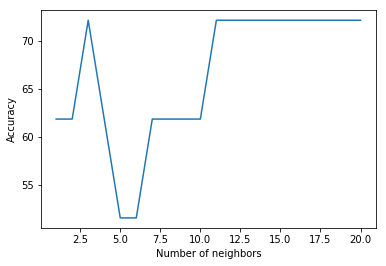

In [89]:
acc = []
knn_l = []
for i in range(20):
    knn_num = i+1
    knn_l.append(knn_num)
    knn_cls = KNeighborsClassifier(n_neighbors = knn_num, weights='distance', algorithm='auto',metric='minkowski')
    knn_cls.fit(X_train, y_train)
    y_pred = knn_cls.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*1000,"% for knn_num:",knn_num)
    acc.append(accuracy_score(y_test,y_pred)*1000)
plt.plot(knn_l,acc)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()